## Machine Learning Course End Project - Employee Turnover Prediction

##
Project Statement:
Portobello Tech is an app innovator who has devised an intelligent way of
predicting employee turnover within the company. It periodically evaluates
employees' work details, including the number of projects they worked on,
average monthly working hours, time spent in the company, promotions in the
last five years, and salary level.
Data from prior evaluations shows the employees’ satisfaction in the workplace.
The data could be used to identify patterns in work style and their interest in
continuing to work for the company.
The HR Department owns the data and uses it to predict employee turnover.
Employee turnover refers to the total number of workers who leave a company
over time.
As the ML Developer assigned to the HR Department, you have been asked to
create ML programs to:
1. Perform data quality checks by checking for missing values, if any.
2. Understand what factors contributed most to employee turnover at EDA.
3. Perform clustering of employees who left based on their satisfaction and
evaluation.
4. Handle the left Class Imbalance using the SMOTE technique.
5. Perform k-fold cross-validation model training and evaluate performance.
6. Identify the best model and justify the evaluation metrics used.
7. Suggest various retention strategies for targeted employees.

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [183]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Perform data quality checks by checking for missing values, if any.

In [184]:
df.shape

(14999, 10)

In [185]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

* We see there are no missing values, and therefore do not need to remove rows or impute missing values with mean, median, or mode.
* 'Sales' and 'salary' are categorical features, but so are 'Work_accident' and 'left' since they consist of binary values.

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [187]:
df_cols_list = df.columns.tolist()

In [188]:
num_cols = ['satisfaction_level',
                  'last_evaluation',
                  'number_project', 
                  'average_montly_hours',
                  'time_spend_company',
                  'promotion_last_5years']
num_cols_df = pd.DataFrame(data=df, columns=num_cols)

In [189]:
cat_cols = [col for col in df_cols_list if col not in num_cols]
cat_cols_df = pd.DataFrame(data=df, columns=cat_cols)

## Understand what factors contributed most to employee turnover at EDA.
* Draw a heatmap of the correlation matrix between all numerical features or columns in the data.

In [190]:
corel_matrix = num_cols_df.corr().round(2)
corel_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.07
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,1.00


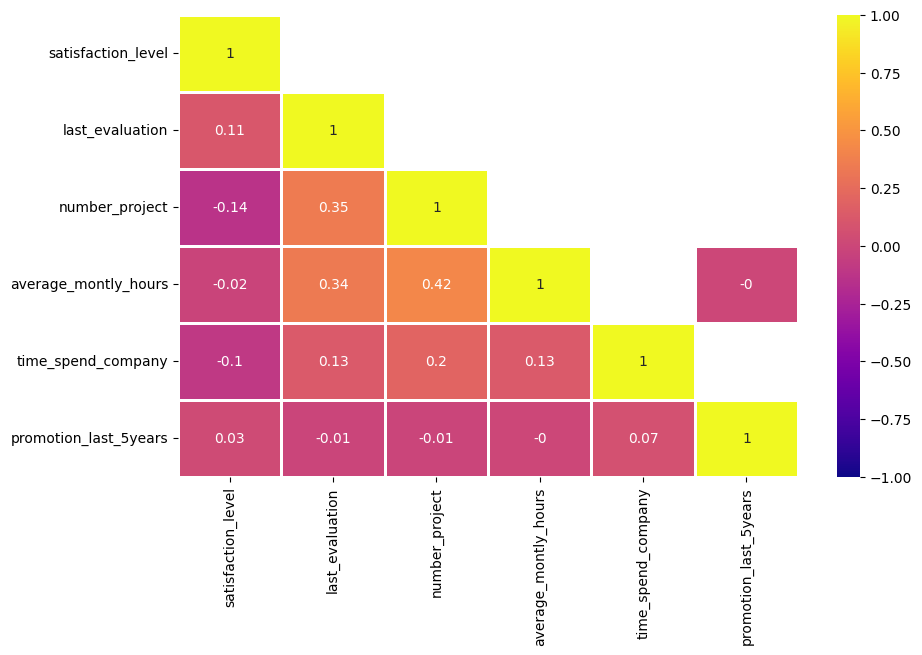

In [191]:
plt.figure(figsize=(10,6))
sns.heatmap(data=corel_matrix,
            vmin=-1,
            vmax=1,
            cmap='plasma',
            mask=np.triu(corel_matrix, k=1),
            linewidths=1,
            linecolor='white',
            annot=True);

* The average monthly hours an employee spends at work is correlated with the number of projects they are involved in.
* Longer work hours = more burnout, more likely to leave.
* An employee's rating or last evaluation also correlated with their average monthly hours in the office. Work longer = higher rating.
* Their evaluation also correlated with the number of projects involved in. More project involvment = higher evaluation scores.
* Employees with higher evalution scores might demonstrate slightly higher satisfaction levels.
* Employees who have been at the company longer tend to be involved with more projects and somewhat receive higher evaluation scores.
* There's negative correlation between satisfaction levels and the amount of projects and time in the office, suggesting employee likelihood to quit.
* Promotions don't seem to correlate with other features quite much.

## Draw the distribution plot of:
* Employee Satisfaction (use column satisfaction_level)
* Employee Evaluation (use column last_evaluation)
* Employee Average Monthly Hours (use column
average_montly_hours)

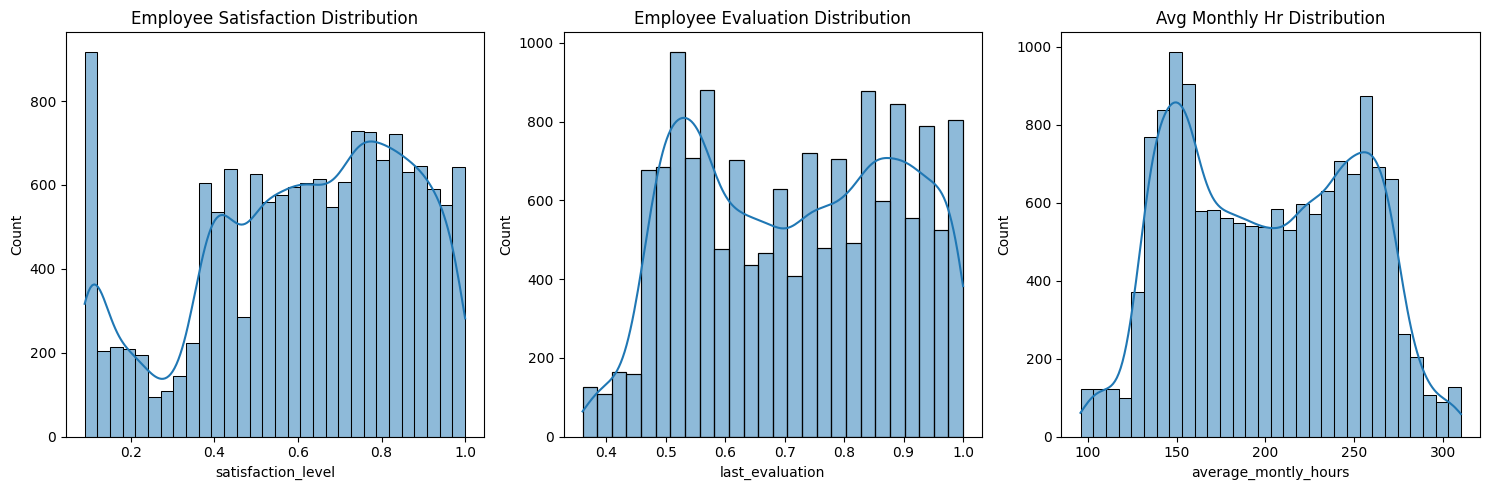

In [192]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(df, x='satisfaction_level', kde=True, ax=axes[0])
axes[0].set_title('Employee Satisfaction Distribution')

sns.histplot(df, x='last_evaluation', kde=True, ax=axes[1])
axes[1].set_title('Employee Evaluation Distribution')

sns.histplot(df, x='average_montly_hours', kde=True, ax=axes[2])
axes[2].set_title('Avg Monthly Hr Distribution')

plt.tight_layout()
plt.show()

## Draw the bar plot of the employee project count of both employees who left and stayed in the organization.
* Use column number_project and hue column left.
* Give your inferences from the plot.

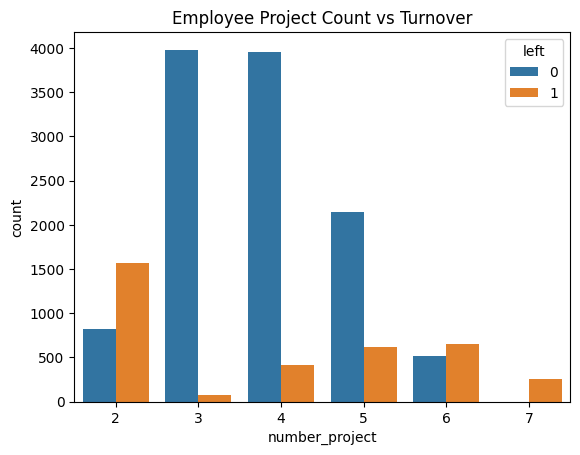

In [193]:
sns.countplot(data=df, x='number_project', hue='left')
plt.title('Employee Project Count vs Turnover')
plt.show()

* Higher number of employees who left either had a low (2) or very high (6 - 7) number of projects to complete.
* Employees who stayed with the company had a balanced distribution of projects to work on (3 - 5).

## Perform clustering of employees who left based on their satisfaction and evaluation.
* Choose columns satisfaction_level, last_evaluation, and left.
* Do K-means clustering of employees who left the company into 3 clusters.

In [194]:
from sklearn.cluster import KMeans

In [195]:
# let's filter the employees who left, accounting for just the satisfaction level and last evaluation

In [196]:
left_employees = df[df['left']==1][['satisfaction_level', 'last_evaluation']]

In [197]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(left_employees)

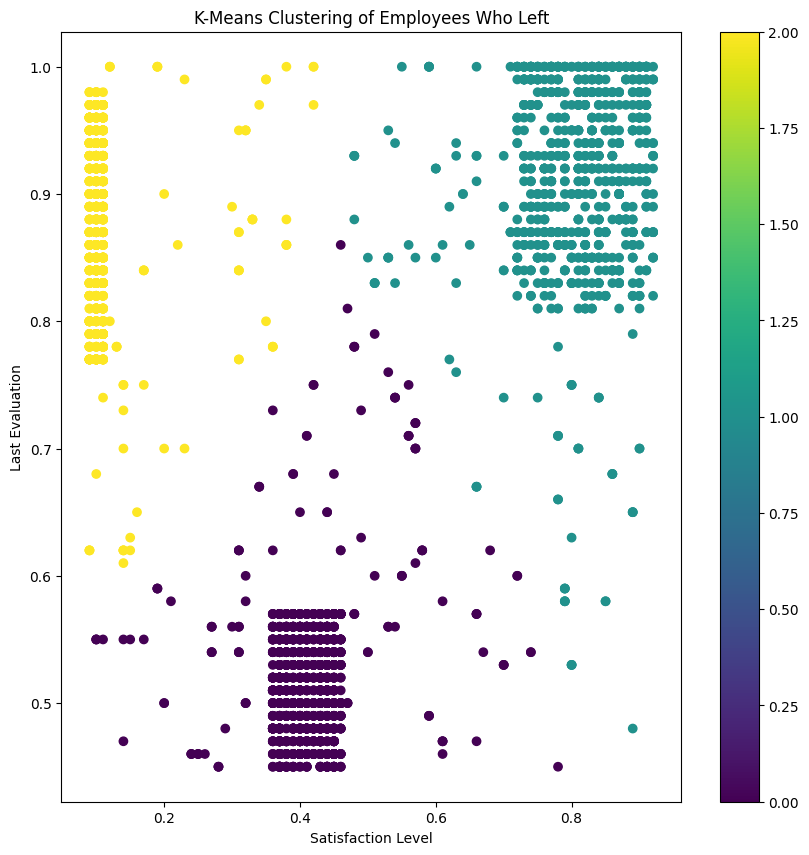

In [198]:
plt.figure(figsize=(10,10))
scatter = plt.scatter(left_employees['satisfaction_level'],
            left_employees['last_evaluation'],
            c=clusters,
            cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('K-Means Clustering of Employees Who Left')
plt.show()

## Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

* Cluster 1 (yellow): high evaluation level, low satisfaction level. Employees were probably overworked and felt underappreciated.
* Cluster 2 (purple): low evaluation level, low-moderate satisfaction level. Employees were likely disengaged from their work.
* Cluster 3 (green): high evaluation level, high satisfaction level. Employees most likely left for new opportunities.

## Handle the left Class Imbalance using the SMOTE technique.
## Pre-process the data by converting categorical columns to numerical columns by:
* Separating categorical variables and numeric variables.
* Applying get_dummies() to the categorical variables.
* Combining categorical variables and numeric variables.

In [199]:
df_encoded = pd.get_dummies(data=df, columns=cat_cols)
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,Work_accident_0,Work_accident_1,left_0,left_1,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,True,False,False,True,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,True,False,False,True,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,True,False,False,True,...,False,False,False,False,True,False,False,False,True,False


In [200]:
X = df_encoded.drop(['left_0', 'left_1'], axis=1) # drop the target feature
Y = df_encoded['left_1'] # our target prediction feature

## Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [201]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=123)

## Upsample the train dataset using the SMOTE technique from the imblearn module.

In [202]:
from imblearn.over_sampling import SMOTE

In [203]:
smote = SMOTE(random_state=123)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

## Perform 5-fold cross-validation model training and evaluate performance.
## Train a logistic regression model, apply a 5-fold CV, and plot the classification report.

In [204]:
from sklearn.linear_model import LogisticRegression

In [205]:
lr_model = LogisticRegression(random_state=123)
lr_scores = cross_val_score(lr_model, x_train_resampled, y_train_resampled, cv=5)
print("Logistic Regression CV Scores:", lr_scores)
print("Mean CV Score:", lr_scores.mean())

Logistic Regression CV Scores: [0.73065354 0.76592836 0.82116489 0.80831282 0.8178337 ]
Mean CV Score: 0.7887786619468433


## Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.

In [206]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [207]:
rf_model = RandomForestClassifier(random_state=123)
rf_scores = cross_val_score(rf_model, x_train_resampled, y_train_resampled, cv=5)
print("Random Forest CV Scores: ", rf_scores)
print("Mean CV Score: ", rf_scores.mean())

Random Forest CV Scores:  [0.97839759 0.98331966 0.98660104 0.98632759 0.9868709 ]
Mean CV Score:  0.9843033563520457


## Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.

In [208]:
gb_model = GradientBoostingClassifier(random_state=123)
gb_scores = cross_val_score(gb_model, x_train_resampled, y_train_resampled, cv=5)
print("Gradient Boosting CV Scores:", gb_scores)
print("Mean CV Score:", gb_scores.mean())

Gradient Boosting CV Scores: [0.95925622 0.96062346 0.96773311 0.96636587 0.96252735]
Mean CV Score: 0.963301204667886


## Identify the best model and justify the evaluation metrics used.
## Find the ROC/AUC for each model and plot the ROC curve.

In [209]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

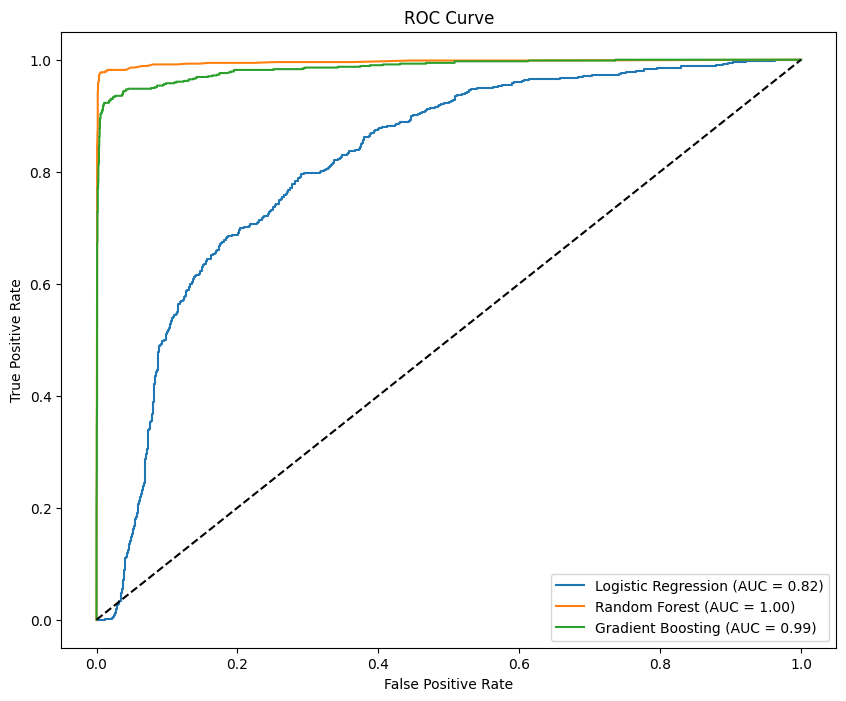

In [210]:
models = [lr_model, rf_model, gb_model]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

plt.figure(figsize=(10, 8))

for model, name in zip(models, model_names):
    model.fit(x_train_resampled, y_train_resampled)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Find the confusion matrix for each of the models.

In [211]:
for model, name in zip(models, model_names):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(cm)
    print("\n")

Confusion Matrix for Logistic Regression:
[[1745  541]
 [ 200  514]]


Confusion Matrix for Random Forest:
[[2267   19]
 [  16  698]]


Confusion Matrix for Gradient Boosting:
[[2229   57]
 [  47  667]]




## Explain which metric needs to be used from the confusion matrix: Recall or Precision?

* We should focus on the Recall metric. 
* Recall measures the proportion of actual positive cases (employees who left) that were correctly identified.
* It's crucial for employee turnover prediction because: False negatives (predicting an employee will stay when they actually leave) are more costly than false positives.
* Identifying employees at risk of leaving allows the company to take preventive measures.

## Suggest various retention strategies for targeted employees.
## Using the best model, predict the probability of employee turnover in the test data.

In [212]:
# random forest classifier is the best model
# as it has an AUC of 1.00 vs 0.99 of the gradient boosting classifier
# and vs 0.82 of the logistic regression model
best_model = rf_model
best_model.fit(x_train_resampled, y_train_resampled)
turnover_probabilities = best_model.predict_proba(x_test)[:,1]
turnover_probabilities

array([0.  , 0.57, 0.03, ..., 0.03, 0.05, 0.98])

In [213]:
# assume gradient boosting classifier is the best model
#best_model = gb_model
#best_model.fit(x_train_resampled, y_train_resampled)
#turnover_probabilities = best_model.predict_proba(x_test)[:,1]
#turnover_probabilities

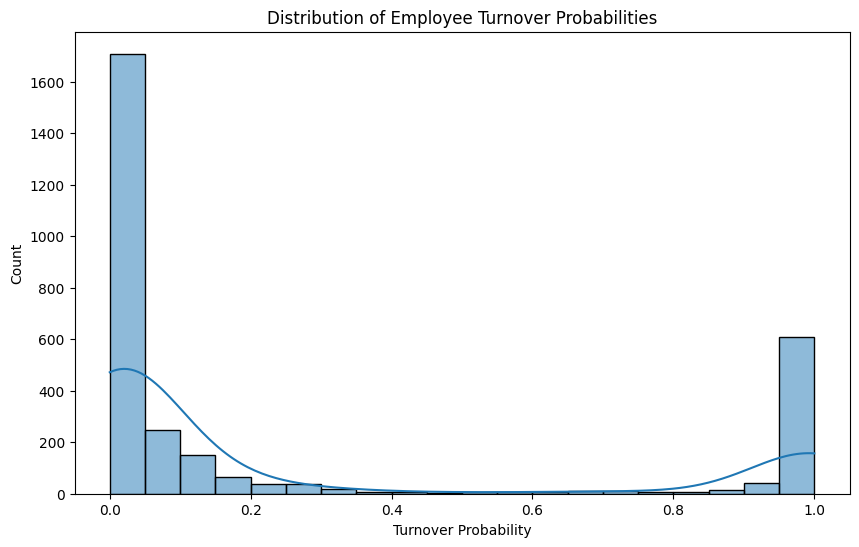

In [214]:
plt.figure(figsize=(10, 6))
sns.histplot(turnover_probabilities, bins=20, kde=True)
plt.title('Distribution of Employee Turnover Probabilities')
plt.xlabel('Turnover Probability')
plt.ylabel('Count')
plt.show()

## Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
* Safe Zone (Green) (Score < 20%)
* Low-Risk Zone (Yellow) (20% < Score < 60%)
* Medium-Risk Zone (Orange) (60% < Score < 90%)
* High-Risk Zone (Red) (Score > 90%).

In [215]:
def category_risk(probability):
    if probability < 0.2:
        return "Safe Zone: Green"
    elif probability < 0.6:
        return "Low-Risk Zone: Yellow"
    elif probability < 0.9:
        return "Medium-Risk Zone: Orange"
    elif probability > 0.9:
        return "High-Risk Zone: Red"
    else:
        return

risk_categories = [category_risk(prob) for prob in turnover_probabilities]

In [216]:
risk_category_counts = pd.Series(risk_categories).value_counts().sort_index()

print("Risk Category Distribution:")
print(risk_category_counts)

Risk Category Distribution:
High-Risk Zone: Red          640
Low-Risk Zone: Yellow        121
Medium-Risk Zone: Orange      56
Safe Zone: Green            2173
Name: count, dtype: int64


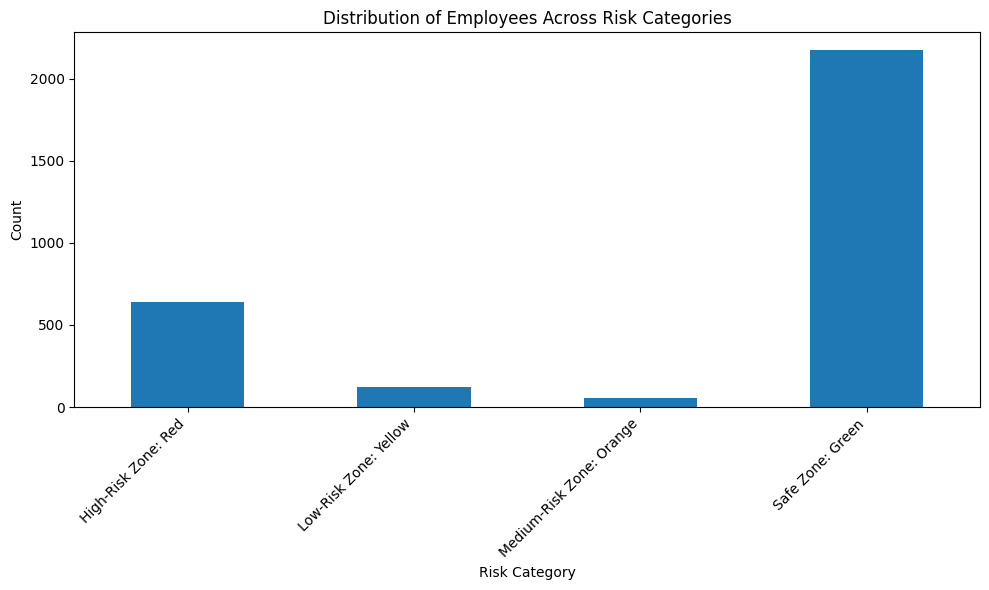

In [217]:
plt.figure(figsize=(10, 6))
risk_category_counts.plot(kind='bar')
plt.title('Distribution of Employees Across Risk Categories')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

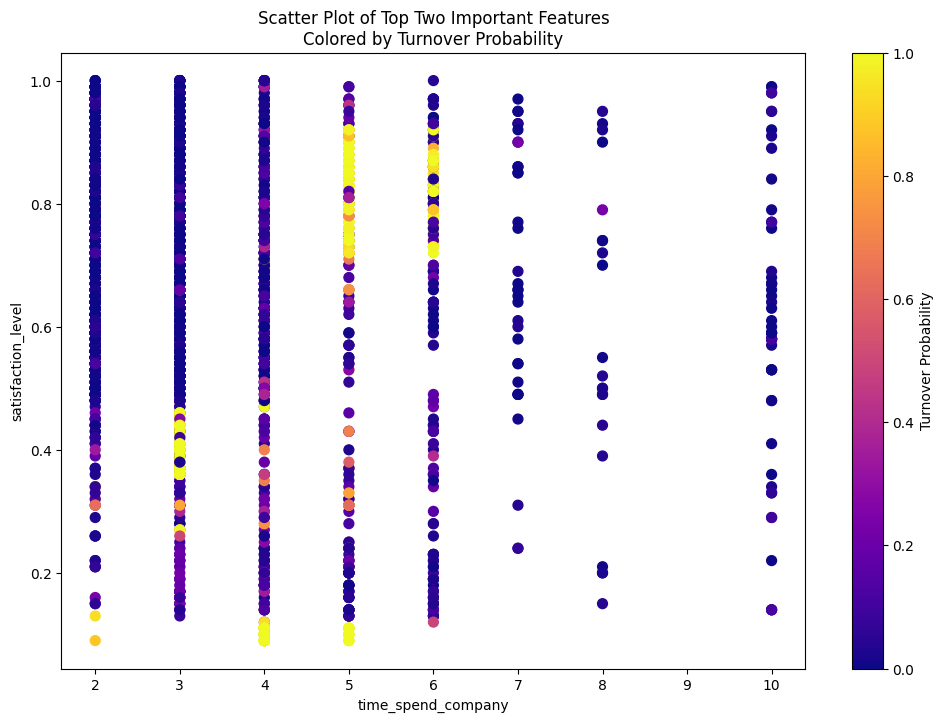

In [218]:
feature_importances = best_model.feature_importances_
top_two_features = np.argsort(feature_importances)[-2:]
feature_names = x_test.columns[top_two_features]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(x_test.iloc[:, top_two_features[0]], 
                      x_test.iloc[:, top_two_features[1]], 
                      c=turnover_probabilities, 
                      cmap='plasma', 
                      s=50)
plt.colorbar(scatter, label='Turnover Probability')
plt.title(f'Scatter Plot of Top Two Important Features\nColored by Turnover Probability')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

* Safe Zone (Green): Maintain current practices, regular check-ins, and opportunities for growth.
* Low-Risk Zone (Yellow): Increase engagement through additional responsibilities or projects, provide mentorship opportunities.
* Medium-Risk Zone (Orange): Conduct in-depth interviews to understand concerns, offer targeted training or development programs, consider role adjustments or transfers.
* High-Risk Zone (Red): Immediate intervention required. Schedule one-on-one meetings with management, offer personalized retention packages, address specific pain points, and consider fast-track promotion or significant role changes.